In [1]:
import psfmachine as psf
import lightkurve as lk
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import warnings
from scipy.sparse import SparseEfficiencyWarning

warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=SparseEfficiencyWarning)

%matplotlib widget

In [2]:
ra = 202.9625
dec = -10.736
folder = "/Users/zgl12/Research/K2_Files/wcs/"

files = sorted(os.listdir(folder))
files = [folder + f for f in files]

print(files)

# for i in range(len(files)):
#     with fits.open(files[i], mode='update') as hdul:
#         data = hdul[0].data  # Assuming the data is in the primary HDU

#         data[np.isnan(data)] = 0

#         if np.nanmedian(data) != 100:

#             data += 100

#         hdul.flush()

machine = psf.SSMachine.from_file(files, magnitude_limit=17, dr=3)


Set MJD-END to 57230.009094 from DATE-END'. [astropy.wcs.wcs]
2024-06-24 23:25:25,968 - astroquery - WARNING - FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 57229.988660 from DATE-OBS.
Set MJD-END to 57230.009094 from DATE-END'.


['/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112000_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112001_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112002_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112003_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112004_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112005_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112006_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112008_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112009_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112010_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112011_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112012_wcs.fits', '/Users/zgl12/Research/K2_Files/wcs/k2mosaic-c06-ch61-cad112013_wcs.fits', '/Users/zgl12/Research/K

Creating delta arrays: 100%|██████████| 1210/1210 [00:14<00:00, 84.12it/s] 


Building shape model per frame: 100%|██████████| 815/815 [1:31:25<00:00,  6.73s/it]


NaN's in flux:  0
NaN's in flux error:  0


Fitting 1210 Sources (per frame model): 100%|██████████| 815/815 [00:52<00:00, 15.39it/s]


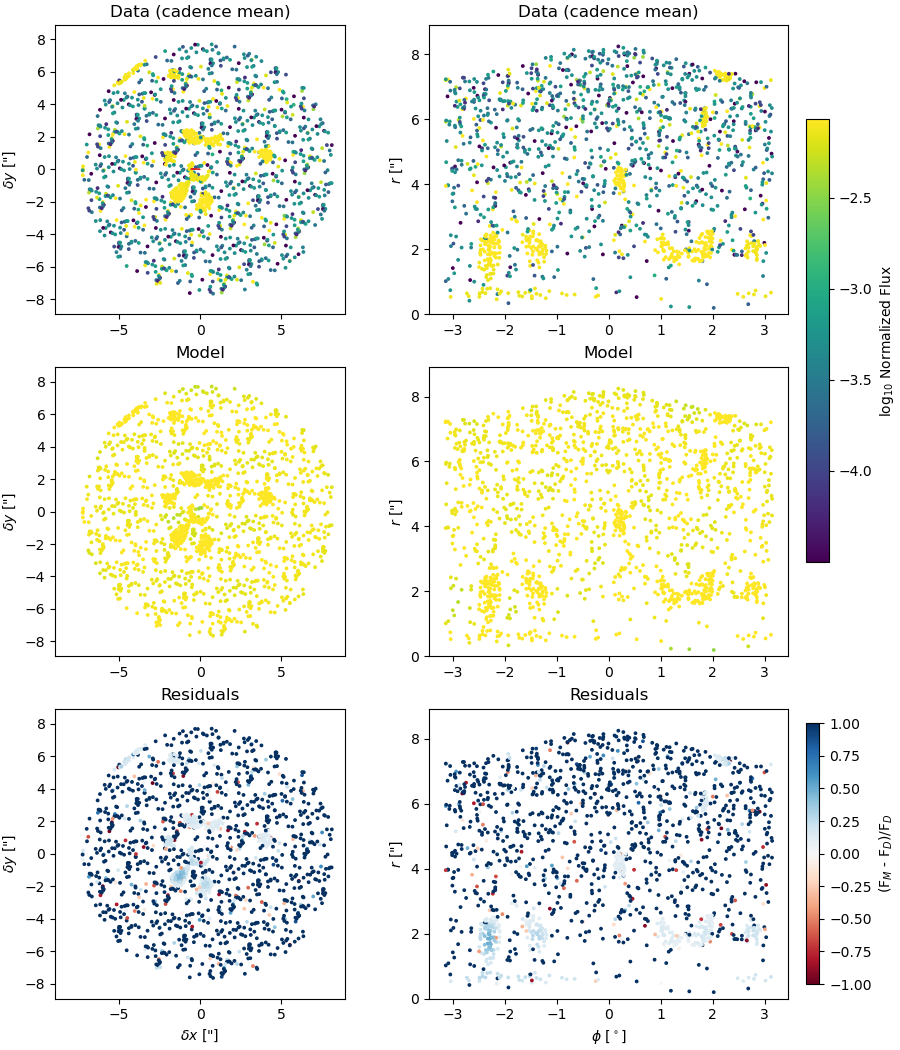

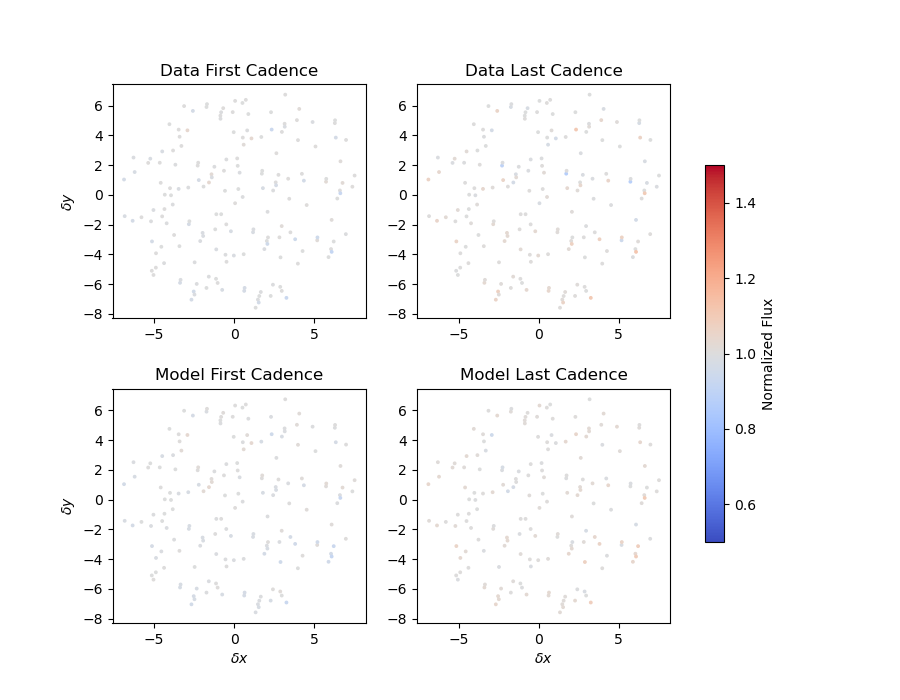

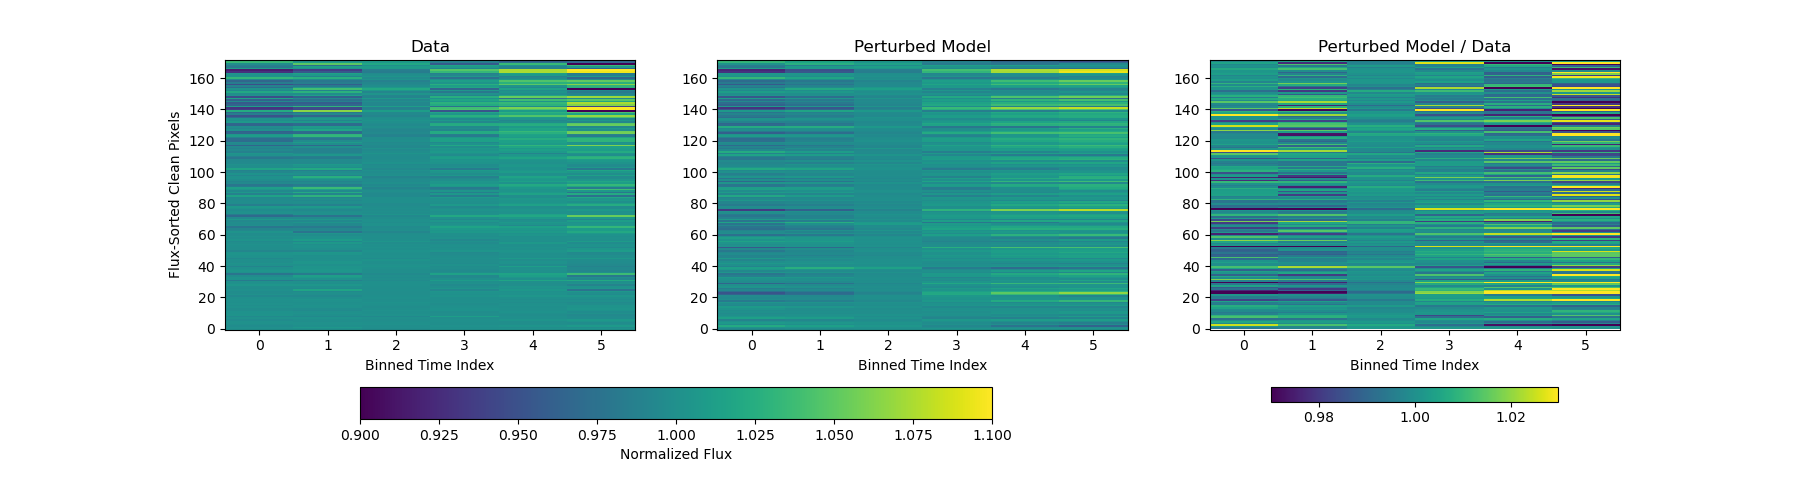

In [3]:
# machine.fit_lightcurves(plot=True, iter_negative=True, fit_mean_shape_model=False, fit_va=True, sap=True)


machine.fit_lightcurves(plot=True, iter_negative=True, fit_mean_shape_model=True, fit_va=True, sap=True)



In [4]:
# machine.fit_frame_model()
# machine.compute_aperture_photometry(aperture_size="optimal", target_complete=1, target_crowd=1)


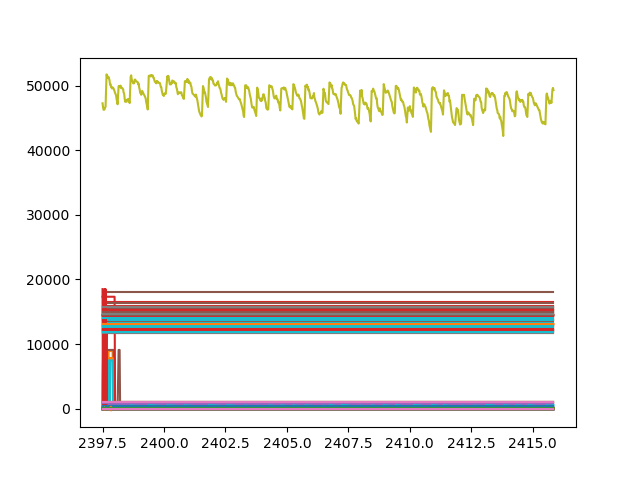

In [11]:
plt.figure()
for i in range(100):
    # data = machine.lcs[i].to_pandas().to_numpy()
    plt.plot(machine.time, machine.sap_flux[:, i])
    plt.plot(machine.time, machine.ws_frame[:, i])
    plt.plot(machine.time, machine.ws_va[:, i])
    plt.plot(machine.time, machine.ws[:, i])

# plt.plot(times, data1[:,0])
# plt.ylim(-500, 2000)
plt.show()